In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

[Catalog](http://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/A+A/596/A14)

#### Read and merge data

In [2]:
galist_2 = pd.read_csv('../data/galist_2.csv') # 2MRS galaxies used, as well as their IDs and coordinates
galist_s = pd.read_csv('../data/galist_s.csv') #SDSS galaxies used, as well as their IDs and coordinates
grlist_2 = pd.read_csv('../data/grlist_2.csv') # groups and their parameters detected in 2MRS
grlist_s = pd.read_csv('../data/grlist_s.csv') # groups and their parameters detected in SDSS DR12 

In [3]:
gr2 = galist_2.join(grlist_2.set_index('iGrID'), on='iGrID', lsuffix='_galaxy', rsuffix='_group')
grs = galist_s.join(grlist_s.set_index('iGrID'), on='iGrID', lsuffix='_galaxy', rsuffix='_group')

In [4]:
gr2 = gr2[gr2['Ntot']>30]
grs = grs[grs['Ntot']>30]

- `z_group` — Redshift of the group centre (CMB-corrected)
- `z_galaxy` — Redshift of the galaxy (CMB-corrected)
- `RAJ2000_galaxy` — Rigth ascension (~ longtitude)
- `RAJ2000_group` — Right ascension of the group centre
- `DEJ2000_group` — declination of the group centre (~ latitude)

#### Scatter plot

In [5]:
def plot_distance(data, grid, ax):
    group = data[data['iGrID'] == grid]
    rs = group['z_galaxy'] - group['z_group']
    dist = np.sqrt([(group['RAJ2000_group'] - group['RAJ2000_galaxy']) ** 2 + 
            (group['DEJ2000_group'] - group['DEJ2000_galaxy']) ** 2])
    ax.scatter(y=rs, x=dist, c='g', alpha=0.5)
    ax.set_ylabel('z_galaxy-z_group')
    ax.set_xlabel('Distance from centre in degrees')
    ax.set_title('iGrID = {}'.format(grid))

    

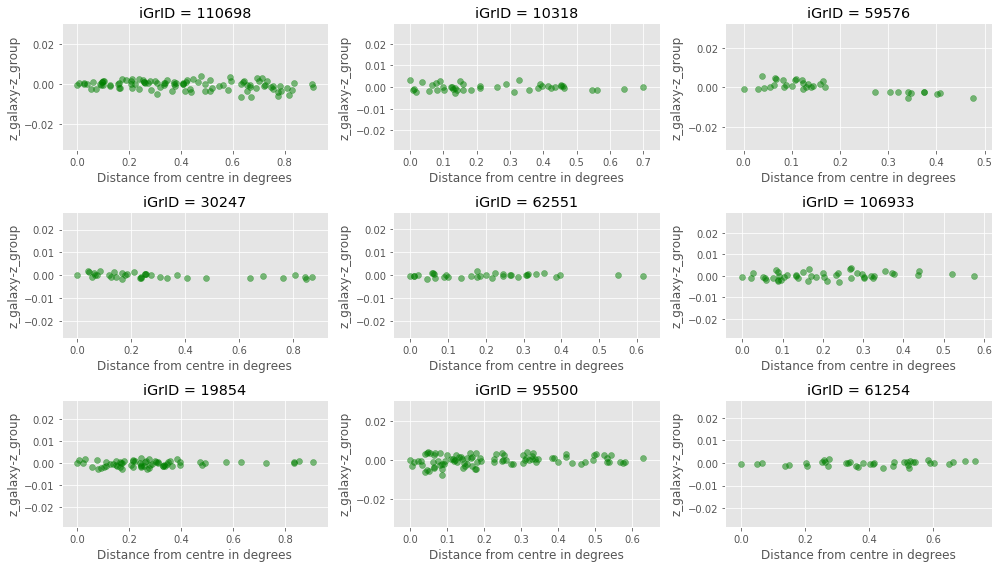

In [6]:
fig, ax = plt.subplots(3, 3, figsize = (14, 8))                                      
grids = np.random.choice(grs.iGrID.unique(), 9, replace=False) # for grs table
for i in range(9):
    plot_distance(grs, grids[i], ax[i//3, i%3])
plt.tight_layout() 

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (14, 8))                                      
grid2 = np.random.choice(gr2.iGrID.unique(), 9, replace=False) # for gr2 table
for i in range(9):
    plot_distance(gr2, grid2[i], ax[i//3, i%3])
plt.tight_layout() 
    